In [ ]:
!pip install numpy==1.24.0
!pip install pmdarima


  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [ ]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox


In [ ]:
veri = pd.read_csv("/content/AirPassengers.csv")
print(veri)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


In [ ]:
veri.rename(columns={"Month": "Tarih", "#Passengers": "Yolcu Sayısı"}, inplace=True)
print(veri)

            Yolcu Sayısı
Tarih                   
1949-01-31           112
1949-02-28           118
1949-03-31           132
1949-04-30           129
1949-05-31           121
...                  ...
1960-08-31           606
1960-09-30           508
1960-10-31           461
1960-11-30           390
1960-12-31           432

[144 rows x 1 columns]


In [ ]:
print(veri.dtypes)

Yolcu Sayısı    int64
dtype: object


In [ ]:
tarih = pd.date_range(start="1949-01-01", periods=len(veri), freq="M")
veri["Tarih"] = tarih
veri.set_index("Tarih", inplace=True)
print(veri)

            Yolcu Sayısı
Tarih                   
1949-01-31           112
1949-02-28           118
1949-03-31           132
1949-04-30           129
1949-05-31           121
...                  ...
1960-08-31           606
1960-09-30           508
1960-10-31           461
1960-11-30           390
1960-12-31           432

[144 rows x 1 columns]


/tmp/ipython-input-11-563793150.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tarih = pd.date_range(start="1949-01-01", periods=len(veri), freq="M")


In [ ]:
print(veri.isnull().sum())

Yolcu Sayısı    0
dtype: int64


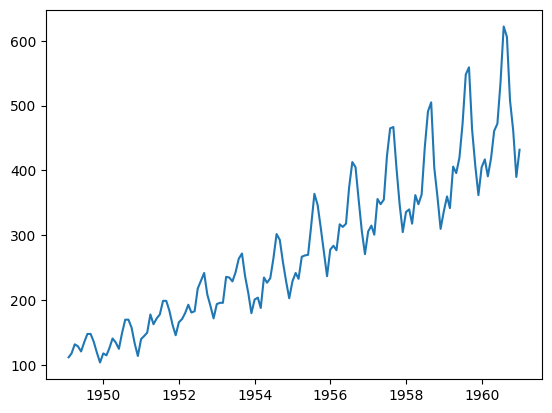

In [ ]:
plt.plot(veri)
plt.show()

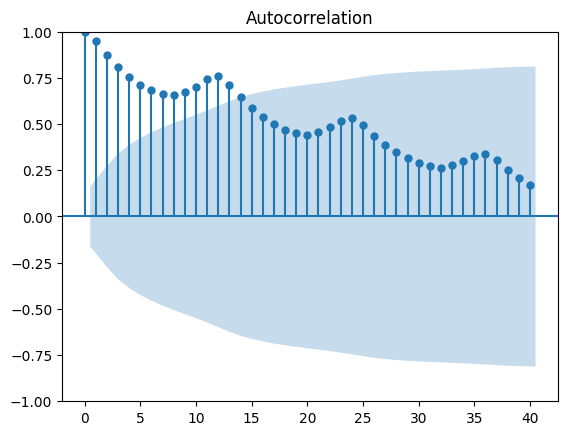

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(veri,lags=40)
plt.show()


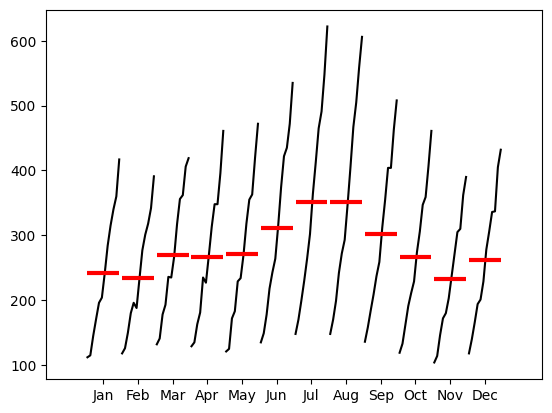

In [ ]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(veri)
plt.show()

In [ ]:
verion = veri.iloc[:-24]
verison = veri[-24:]

print(verison)

            Yolcu Sayısı
Tarih                   
1959-01-31           360
1959-02-28           342
1959-03-31           406
1959-04-30           396
1959-05-31           420
1959-06-30           472
1959-07-31           548
1959-08-31           559
1959-09-30           463
1959-10-31           407
1959-11-30           362
1959-12-31           405
1960-01-31           417
1960-02-29           391
1960-03-31           419
1960-04-30           461
1960-05-31           472
1960-06-30           535
1960-07-31           622
1960-08-31           606
1960-09-30           508
1960-10-31           461
1960-11-30           390
1960-12-31           432


In [ ]:
!pip install arch
from arch.unitroot import ADF,KPSS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 40.8 MB/s eta 0:00:00


In [ ]:
adf = ADF(verion)
kpss =  KPSS(verion)
print(adf)
print(kpss)

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.773
P-value                         0.827
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  1.706
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [ ]:
veri_fark = verion.diff().dropna()
adf1 = ADF(veri_fark)
kpss1 =  KPSS(veri_fark)
print(adf1)
print(kpss1)

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.164
P-value                         0.220
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.019
P-value                         0.996
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


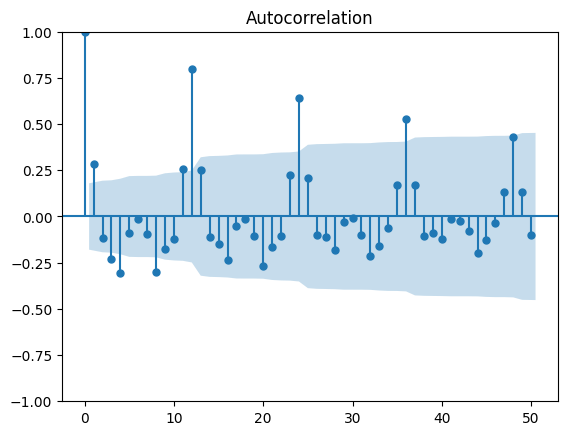

In [ ]:
plot_acf1 = plot_acf(veri_fark,lags=50)
plt.show()

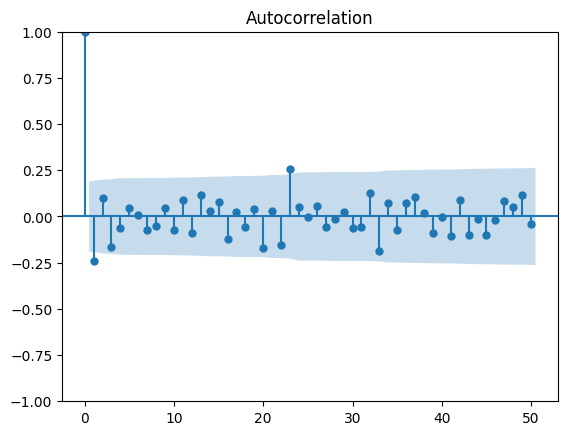

In [ ]:
veri_fark_mevsim = veri_fark.diff(12).dropna()
plot_acf2 = plot_acf(veri_fark_mevsim,lags=50)
plt.show()

In [ ]:
adf2 = ADF(veri_fark_mevsim)
kpss2 =  KPSS(veri_fark_mevsim)
print(adf2)
print(kpss2)

   Augmented Dickey-Fuller Results   
Test Statistic                -13.052
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.109
P-value                         0.545
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [ ]:
model = auto_arima(verion, trace=True, seasonal=True,m=12,d=1)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=807.655, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=804.973, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=805.408, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=803.281, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,1)[12]             : AIC=805.044, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=805.093, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=804.813, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,0)[12]             : AIC=803.650, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=806.793, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=805.281, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 3.896 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -399.641
Date:                            Wed, 02 Jul 2025   AIC                            803.281
Time:                                    07:10:17   BIC                            808.627
Sample:                                01-31-1949   HQIC                           805.448
                                     - 12-31-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [ ]:
hata = model.resid()
q = acorr_ljungbox(hata)
print(q)

     lb_stat  lb_pvalue
1   0.000411   0.983819
2   0.617111   0.734507
3   0.983062   0.805350
4   1.283585   0.864154
5   1.675589   0.891961
6   1.726353   0.943069
7   2.459555   0.930112
8   3.138440   0.925371
9   3.387549   0.946932
10  4.800462   0.904102


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


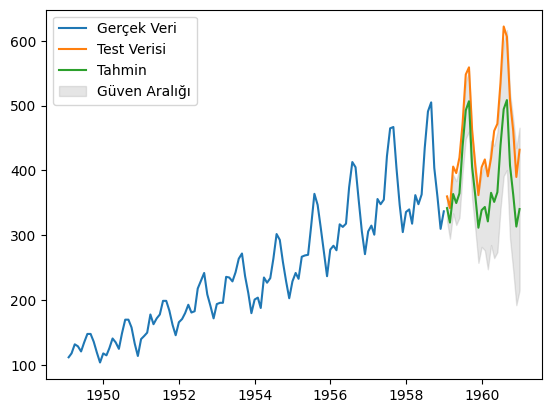

In [42]:
tahmin,ga = model.predict(n_periods=24,return_conf_int=True)
plt.plot(verion,label="Gerçek Veri")
plt.plot(verison,label="Test Verisi")
plt.plot(tahmin,label="Tahmin")
plt.fill_between(verison.index,ga[:,0],ga[:,1],alpha=0.2,label="Güven Aralığı",color="gray")
plt.legend(loc="upper left")
plt.show()